Logistic Regression with the Boston dataset

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X.shape, y.shape

((506, 13), (506,))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,binary_y, 
                                                    test_size=0.33, random_state=5)
logistic = LogisticRegression(max_iter=2000)
logistic.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print('In-sample accuracy: %0.3f' %
accuracy_score(y_train, logistic.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' %
accuracy_score(y_test, logistic.predict(X_test)))

In-sample accuracy: 0.985
Out-of-sample accuracy: 0.964


In [5]:
boston=load_boston()

In [6]:
# Comupute the regression coefficients
for var,coef in zip(boston.feature_names,
logistic.coef_[0]):
  print("%7s : %7.3f" %(var, coef))

   CRIM :   0.076
     ZN :   0.010
  INDUS :   0.131
   CHAS :  -0.612
    NOX :  -0.025
     RM :   1.648
    AGE :  -0.002
    DIS :  -0.198
    RAD :   0.424
    TAX :  -0.013
PTRATIO :  -0.644
      B :   0.007
  LSTAT :  -0.817


Predicting with Logistic Regression

In [7]:
print('\nclasses:',logistic.classes_)
print('\nProbs:\n',logistic.predict_proba(X_test)[:3,:])


classes: [0 1]

Probs:
 [[1.84332873e-01 8.15667127e-01]
 [9.76322099e-01 2.36779007e-02]
 [9.99783579e-01 2.16421240e-04]]


Using SVC

In [8]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from sklearn.datasets import load_boston
boston=load_boston()
# Reset data as pandas DataFrame
boston_df = pd.DataFrame(boston.data)
# Label columns
boston_df.columns = boston.feature_names
# Show first five rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Define the label ‘TAX CATEGORY’
def value_check(x):
  if x > 225:
    return 1
  else:
    return 0
boston_df['TAX_CAT'] = boston_df['TAX'].apply(value_check)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_CAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1


In [10]:
# Define y
y=boston_df['TAX_CAT']

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
# We keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.3, random_state=101)
# We scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
from sklearn.svm import SVC
svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train,
cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test,
y_test)
print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (np.mean(cv_performance),test_performance))

Cross-validation accuracy score: 0.921, test accuracy score: 0.941


Using Logistic Regression to measure confusion matrix and provide classification report

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
# We keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.3, random_state=101)
# We scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
cv_performance_lr = cross_val_score(lr, X_train, y_train,
cv=10)
test_performance_lr = lr.fit(X_train, y_train).score(X_test,
y_test)
print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'
% (np.mean(cv_performance_lr),test_performance_lr))

Cross-validation accuracy score: 0.921, test accuracy score: 0.961


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, scoring="roc_auc", cv=5)
lr_train = grid.fit(X_train, y_train)
pred_lr = lr_train.predict(X_test)
confusion = confusion_matrix(y_test, pred_lr)
print('Confusion Matrix: \n', confusion[::-1,::1])
print('Classification Report: \n',classification_report(y_test, pred_lr))

Confusion Matrix: 
 [[  3 140]
 [  8   1]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.99      0.98      0.99       143

    accuracy                           0.97       152
   macro avg       0.86      0.93      0.89       152
weighted avg       0.98      0.97      0.97       152



In [14]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('LR Classification Accuracy Score: %0.2f'% accuracy_score(pred_lr, lr.predict(X_test)))

LR Classification Accuracy Score: 0.95


In [15]:
# Compute true and false predictions
i = confusion.shape
truePred = 0
falsePred = 0
for row in range(i[0]):
  for j in range(i[1]):
    if row == j:
      truePred +=confusion[row,j]
    else:
      falsePred += confusion[row,j]
print('True predictions: ', truePred)
print('\nFalse predictions', falsePred)
print('\nAccuracy of the model is: ', round(truePred/(confusion.sum()),2))

True predictions:  148

False predictions 4

Accuracy of the model is:  0.97


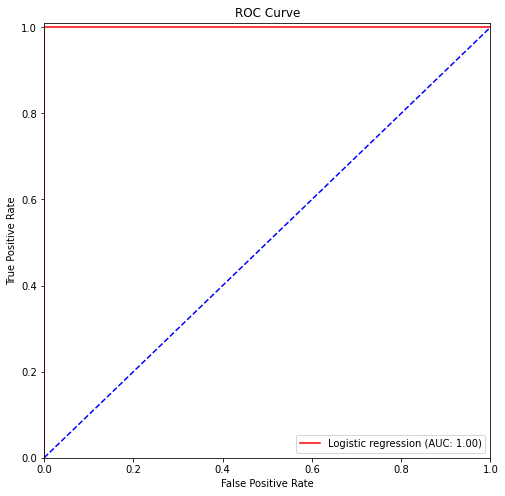

In [16]:
# Receiver Operating Curve (ROC)
Y_scores = lr.decision_function(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(pred_lr, Y_scores)
# Area Under the Curve (AUC)
from sklearn.metrics import auc
auc(fpr, tpr)
# ROC curve with Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Using Pipeline to get the overall score
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaling', MinMaxScaler()), ('lr', LogisticRegression())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaling', MinMaxScaler()), ('lr', LogisticRegression())])
print('Pipe Score: \n%0.2f'% pipe.score(X_test, y_test))

Pipe Score: 
0.94


Tuning the SVC hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV
import numpy as np
best_SVC = SVC(kernel='linear', random_state=101)
search_space = [{'kernel': ['linear'],
'C': np.logspace(-3, 3, 7)},
{'kernel': ['rbf'],
'C':np.logspace(-3, 3, 7),
'gamma': np.logspace(-3, 2, 6)}]
gridsearch = GridSearchCV(best_SVC,
param_grid=search_space,
refit=True, cv=10)

gridsearch.fit(X_train,y_train)
print ('Best parameter: %s'
% str(gridsearch.best_params_))
print ('Best score: %s'
% str(gridsearch.best_score_))
print ('Best index: %s'
% str(gridsearch.best_index_))

Best parameter: {'C': 100.0, 'kernel': 'linear'}
Best score: 0.9971428571428571
Best index: 5
